In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lstm_predictor import generate_data, load_csvdata, lstm_model

In [31]:
LOG_DIR = './ops_logs'
TIMESTEPS = 30
RNN_LAYERS = [{'steps': TIMESTEPS}]
DENSE_LAYERS = [10, 10]
TRAINING_STEPS = 100000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

In [32]:
store = pd.HDFStore('../data/base_store.h5')
base = store['base'] 
base.head()

,code,close,turn,mkt_cap,open,vol,adjfactor,amount,swing,high,...,lt_borrow,bonds_payable,tot_liab,eqy_belongto_parcomsh,cap_rsrv,surplus_rsrv,undistributed_profit,other_equity_instruments_PRE,tot_liab_shrhldr_eqy,days_since_ipo
0,000001.sz,5.49,1.16,5.582992e+10,5.42,35884061.0,35.91,5.733437e+08,3.36,5.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7216.0
1,000001.sz,5.46,0.76,5.551627e+10,5.48,23746263.0,35.91,3.798691e+08,1.37,5.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7217.0
2,000001.sz,5.42,0.67,5.509807e+10,5.46,20653127.0,35.91,3.271489e+08,2.39,5.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7218.0
3,000001.sz,5.62,2.48,5.718908e+10,5.42,77048221.0,35.91,1.263299e+09,6.83,5.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7219.0
4,000001.sz,5.48,1.17,5.569052e+10,5.56,36187213.0,35.91,5.841725e+08,3.05,5.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7222.0


In [33]:
keep_vars = ['code', 'close', 'transaction_date','mkt_cap','open','vol']
rnn_base = base[keep_vars]
rnn_base = rnn_base[rnn_base.code=='000001.sz']
rnn_base = rnn_base[['close', 'mkt_cap','open','vol']]
rnn_base = rnn_base[['close']]

In [34]:
rnn_base.head()

,close
0,5.49
1,5.46
2,5.42
3,5.62
4,5.48


In [35]:
X, y = load_csvdata(rnn_base, TIMESTEPS, seperate=False)

In [36]:
y

{'test': array([[ 9.4 ],
        [ 9.4 ],
        [ 9.38],
        [ 9.16],
        [ 9.19],
        [ 9.06],
        [ 9.12],
        [ 9.08],
        [ 9.08],
        [ 9.16],
        [ 9.15],
        [ 9.04],
        [ 9.06],
        [ 9.05],
        [ 9.06],
        [ 9.07],
        [ 9.12],
        [ 9.15],
        [ 9.13],
        [ 9.07],
        [ 9.09],
        [ 9.05],
        [ 9.09],
        [ 9.08],
        [ 9.07],
        [ 9.13],
        [ 9.24],
        [ 9.21],
        [ 9.15],
        [ 9.16],
        [ 9.17],
        [ 9.15],
        [ 9.14],
        [ 9.07],
        [ 9.13],
        [ 9.11],
        [ 9.12],
        [ 9.15],
        [ 9.07],
        [ 9.14],
        [ 9.14]]), 'train': array([[ 5.3 ],
        [ 5.34],
        [ 5.33],
        ..., 
        [ 8.9 ],
        [ 8.93],
        [ 8.81]]), 'val': array([[ 8.6 ],
        [ 8.59],
        [ 8.62],
        [ 8.63],
        [ 8.64],
        [ 8.62],
        [ 8.48],
        [ 8.54],
        [ 8.57],
        

In [37]:
regressor = learn.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), 
                                      n_classes=0,
                                      verbose=1,  
                                      steps=TRAINING_STEPS, 
                                      optimizer='Adagrad',
                                      learning_rate=0.03, 
                                      batch_size=BATCH_SIZE)

INFO:tensorflow:Using temporary folder as model directory: /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp8z5nmpe6
INFO:tensorflow:Using temporary folder as model directory: /var/folders/77/jl8t9nkx27q3q1536fj3b87h38zwgl/T/tmp8z5nmpe6


In [38]:
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                      every_n_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)

In [39]:
regressor.fit(X['train'], y['train'], monitors=[validation_monitor], logdir=LOG_DIR)

INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:Training steps [0,100000)
INFO:tensorflow:Training steps [0,100000)
INFO:tensorflow:Step 1: linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0 = 46.173
INFO:tensorflow:Step 1: linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0 = 46.173
INFO:tensorflow:training step 100, loss = 0.16749 (0.017 sec/batch).
INFO:tensorflow:training step 100, loss = 0.16749 (0.017 sec/batch).
INFO:tensorflow:Step 101: linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0 = 0.17809
INFO:tensorflow:Step 101: linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0 = 0.17809
INFO:tensorflow:training step 200, loss = 0.16894 (0.016 sec/batch).
INFO:tensorflow:training step 200, loss = 0.16894 (0.016 sec/batch).
INFO:tensorflow:Step 201: linear_regression/mean_squared_error_regressor/sum_of_squares_loss/value:0 = 0.077431
INFO:tensorflow:Step

TensorFlowEstimator(verbose=1, class_weight=None, batch_size=100, learning_rate=0.03, n_classes=0, continue_training=False, steps=100000, params=None, optimizer=Adagrad, clip_gradients=5.0)

In [40]:
predicted = regressor.predict(X['test'])
mse = mean_absolute_error(y['test'], predicted)
print ("Error: %f" % mse)

INFO:tensorflow:Loading model from checkpoint: ./ops_logs/model.ckpt-2000-?????-of-00001.
INFO:tensorflow:Loading model from checkpoint: ./ops_logs/model.ckpt-2000-?????-of-00001.


Error: 0.043817


In [41]:
# z_p =  list(map(lambda x: x[0] - x[1][4] > 0, zip(predicted, X['test'])))
# err_count =[li for li in list(map(lambda x: x[0] == x[1], zip(z_p, z['test']))) if li == True]
# len(err_count)
# len(err_count)/len(z_p)
# err_count = [l1 for l1 in err if l1 == True]
# err_count

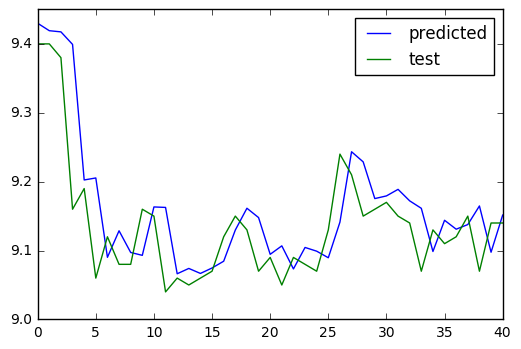

In [42]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='ground truth')
plt.legend(handles=[plot_predicted, plot_test])